# PREDICTIVE MODEL

- how can we improve the model?
- TODO: train and validate with boosting

In [1]:
import pandas as pd
#import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm

In [2]:
df = pd.read_csv("../data/train.csv", sep=";", decimal=",", index_col=[1,2,3])

In [3]:
df.head()

id  Population (% of total)  EDU_TERTIARY_PC_WKGPOP  \
LOCATION TIME GENDER                                                        
AUS      1993 MEN      1                49.780616               23.508869   
              WOMEN    2                50.219384               21.418512   
         1994 MEN      3                49.762137               24.407070   
              WOMEN    4                50.237863               21.740088   
         1995 MEN      5                49.758261               25.825409   

                      CPI_AGRWTH  GDP_USD_CAP  GOV_SPEND_EDU  \
LOCATION TIME GENDER                                           
AUS      1993 MEN       1.753653  19929.78137        5.50922   
              WOMEN     1.753653  19929.78137        5.50922   
         1994 MEN       1.969635  21134.14664        5.24752   
              WOMEN     1.969635  21134.14664        5.24752   
         1995 MEN       4.627767  22098.57288        5.12905   

                      %_Sanitation_Access  \
LOCATION TIME GENDER                        
AUS      1993 MEN                   100.0   
              WOMEN                 100.0   
         1994 MEN                   100.0   
              WOMEN                 100.0   
         1995 MEN                   100.0   

                      Access to Clean Fuels and Technologies for cooking (% of total population) [2 1_ACCESS CFT TOT]  \
LOCATION TIME GENDER                                                                                                    
AUS      1993 MEN                                                   NaN                                                 
              WOMEN                                                 NaN                                                 
         1994 MEN                                                   NaN                                                 
              WOMEN                                                 NaN                                                 
         1995 MEN                                                   NaN                                                 

                      Access to electricity (% of rural population with access) [1 2_ACCESS ELECTRICITY RURAL]  \
LOCATION TIME GENDER                                                                                             
AUS      1993 MEN                                                 100.0                                          
              WOMEN                                               100.0                                          
         1994 MEN                                                 100.0                                          
              WOMEN                                               100.0                                          
         1995 MEN                                                 100.0                                          

                      Access to electricity (% of total population) [1 1_ACCESS ELECTRICITY TOT]  \
LOCATION TIME GENDER                                                                               
AUS      1993 MEN                                                 100.0                            
              WOMEN                                               100.0                            
         1994 MEN                                                 100.0                            
              WOMEN                                               100.0                            
         1995 MEN                                                 100.0                            

                               ...             \
LOCATION TIME GENDER           ...              
AUS      1993 MEN              ...              
              WOMEN            ...              
         1994 MEN              ...              
              WOMEN            ...              
         1995 MEN              ...              

                      Pop

In [4]:
columns = [ 
    "Quality_of_life_measure", 
    
    "CPI_AGRWTH",
    "GDP_USD_CAP",

    "TER_Enrolment_rate",
    "EDU_TERTIARY_PC_WKGPOP",
   
    "Access to Clean Fuels and Technologies for cooking (% of total population) [2 1_ACCESS CFT TOT]",
    "Access to electricity (% of total population) [1 1_ACCESS ELECTRICITY TOT]",
    "%_Sanitation_Access",
       ]

In [5]:
df = df[columns]

In [6]:
# (foreward) fill missing values
df2 = df.groupby("LOCATION").transform(lambda x: x.fillna(method='ffill')).reset_index().dropna() 

In [7]:
y = pd.DataFrame(df2["Quality_of_life_measure"])

In [8]:
X = df2.drop(["Quality_of_life_measure", "LOCATION"], axis=1)

In [9]:
x_with_dummies = pd.get_dummies(X)
x = sm.add_constant(x_with_dummies)

In [10]:
x.columns

Index(['const', 'TIME', 'CPI_AGRWTH', 'GDP_USD_CAP', 'TER_Enrolment_rate',
       'EDU_TERTIARY_PC_WKGPOP',
       'Access to Clean Fuels and Technologies for cooking (% of total population) [2 1_ACCESS CFT TOT]',
       'Access to electricity (% of total population) [1 1_ACCESS ELECTRICITY TOT]',
       '%_Sanitation_Access', 'GENDER_MEN', 'GENDER_WOMEN'],
      dtype='object')

# MODEL
$\text{quality of life} = \beta_{time} \text{TIME} + \beta_{CPI AGRWTH} \text{CPI AGRWTH} + \ldots \text{intercept}$

In [11]:
model = sm.OLS(y, x).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Quality_of_life_measure   R-squared:                       0.136
Model:                                 OLS   Adj. R-squared:                  0.124
Method:                      Least Squares   F-statistic:                     12.26
Date:                     Thu, 03 Jan 2019   Prob (F-statistic):           3.82e-18
Time:                             12:53:21   Log-Likelihood:                 770.56
No. Observations:                      714   AIC:                            -1521.
Df Residuals:                          704   BIC:                            -1475.
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
===================================================================================================================================================================
                                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                              -3.7663      1.113     -3.385      0.001      -5.951      -1.582
TIME                                                                                                0.0030      0.001      3.660      0.000       0.001       0.005
CPI_AGRWTH                                                                                         -0.0020      0.002     -1.320      0.187      -0.005       0.001
GDP_USD_CAP                                                                                     -2.981e-07   3.05e-07     -0.977      0.329   -8.97e-07    3.01e-07
TER_Enrolment_rate                                                                                  0.0005      0.000      2.482      0.013       0.000       0.001
EDU_TERTIARY_PC_WKGPOP                                                                              0.0010      0.000      2.570      0.010       0.000       0.002
Access to Clean Fuels and Technologies for cooking (% of total population) [2 1_ACCESS CFT TOT]     0.0040      0.001      3.793      0.000       0.002       0.006
Access to electricity (% of total population) [1 1_ACCESS ELECTRICITY TOT]                         -0.0041      0.001     -3.936      0.000      -0.006      -0.002
%_Sanitation_Access                                                                                 0.0007      0.001      0.803      0.422      -0.001       0.002
GENDER_MEN                                                                                         -1.8843      0.557     -3.383      0.001      -2.978      -0.791
GENDER_WOMEN                                                                                       -1.8819      0.556     -3.387      0.001      -2.973      -0.791
==============================================================================
Omnibus:                      339.050   Durbin-Watson:                   0.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1766.573
Skew:                          -2.148   Prob(JB):                         0.00
Kurtosis:                       9.397   Cond. No.                     4.16e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.59e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [13]:
model.predict(x).head()

12    0.496465
13    0.508747
14    0.500210
15    0.513390
16    0.512210
dtype: float64

In [14]:
df2["predicted"] = model.predict(x)

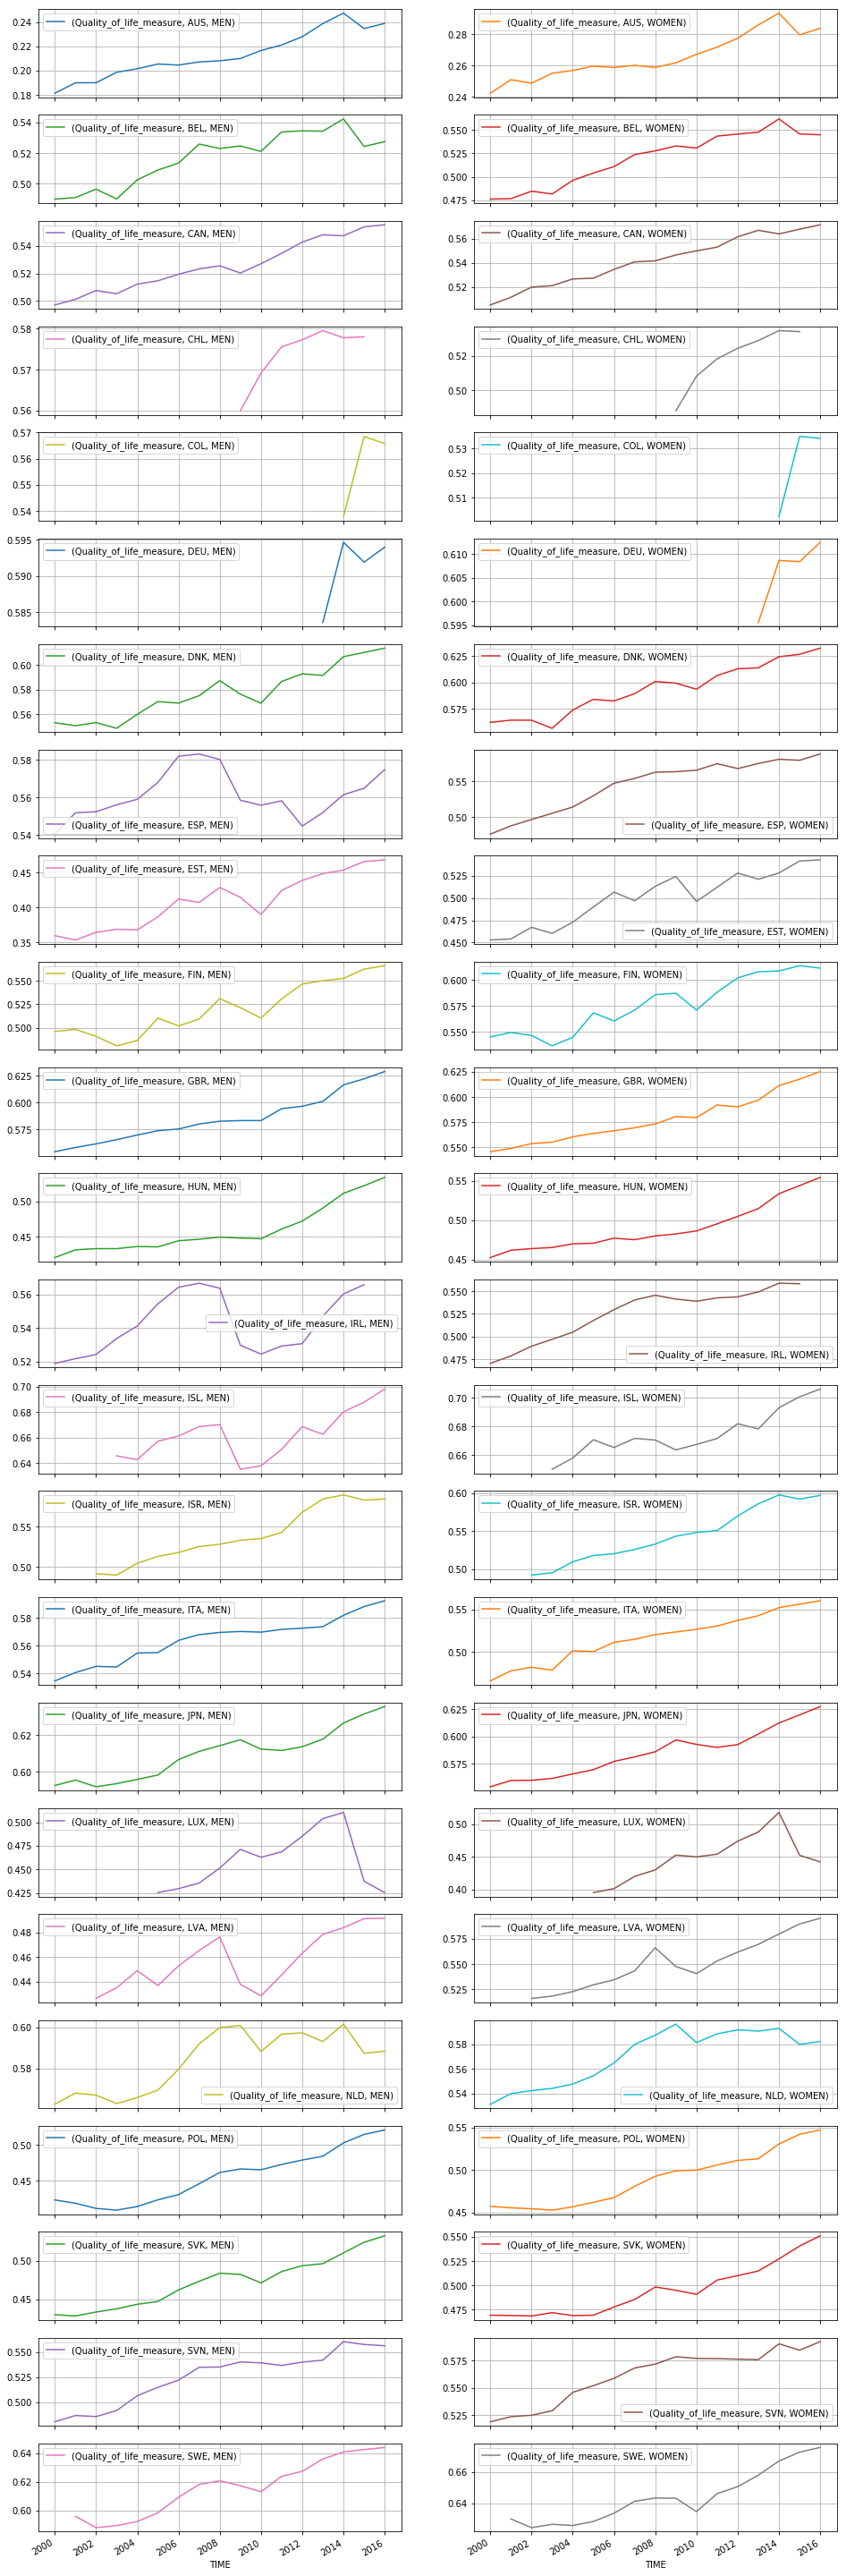

In [15]:
df2.pivot_table(index="TIME", columns=["LOCATION", "GENDER"], values=["Quality_of_life_measure"]).plot(subplots=True, grid=True, layout=(25,2), figsize=(16,60));

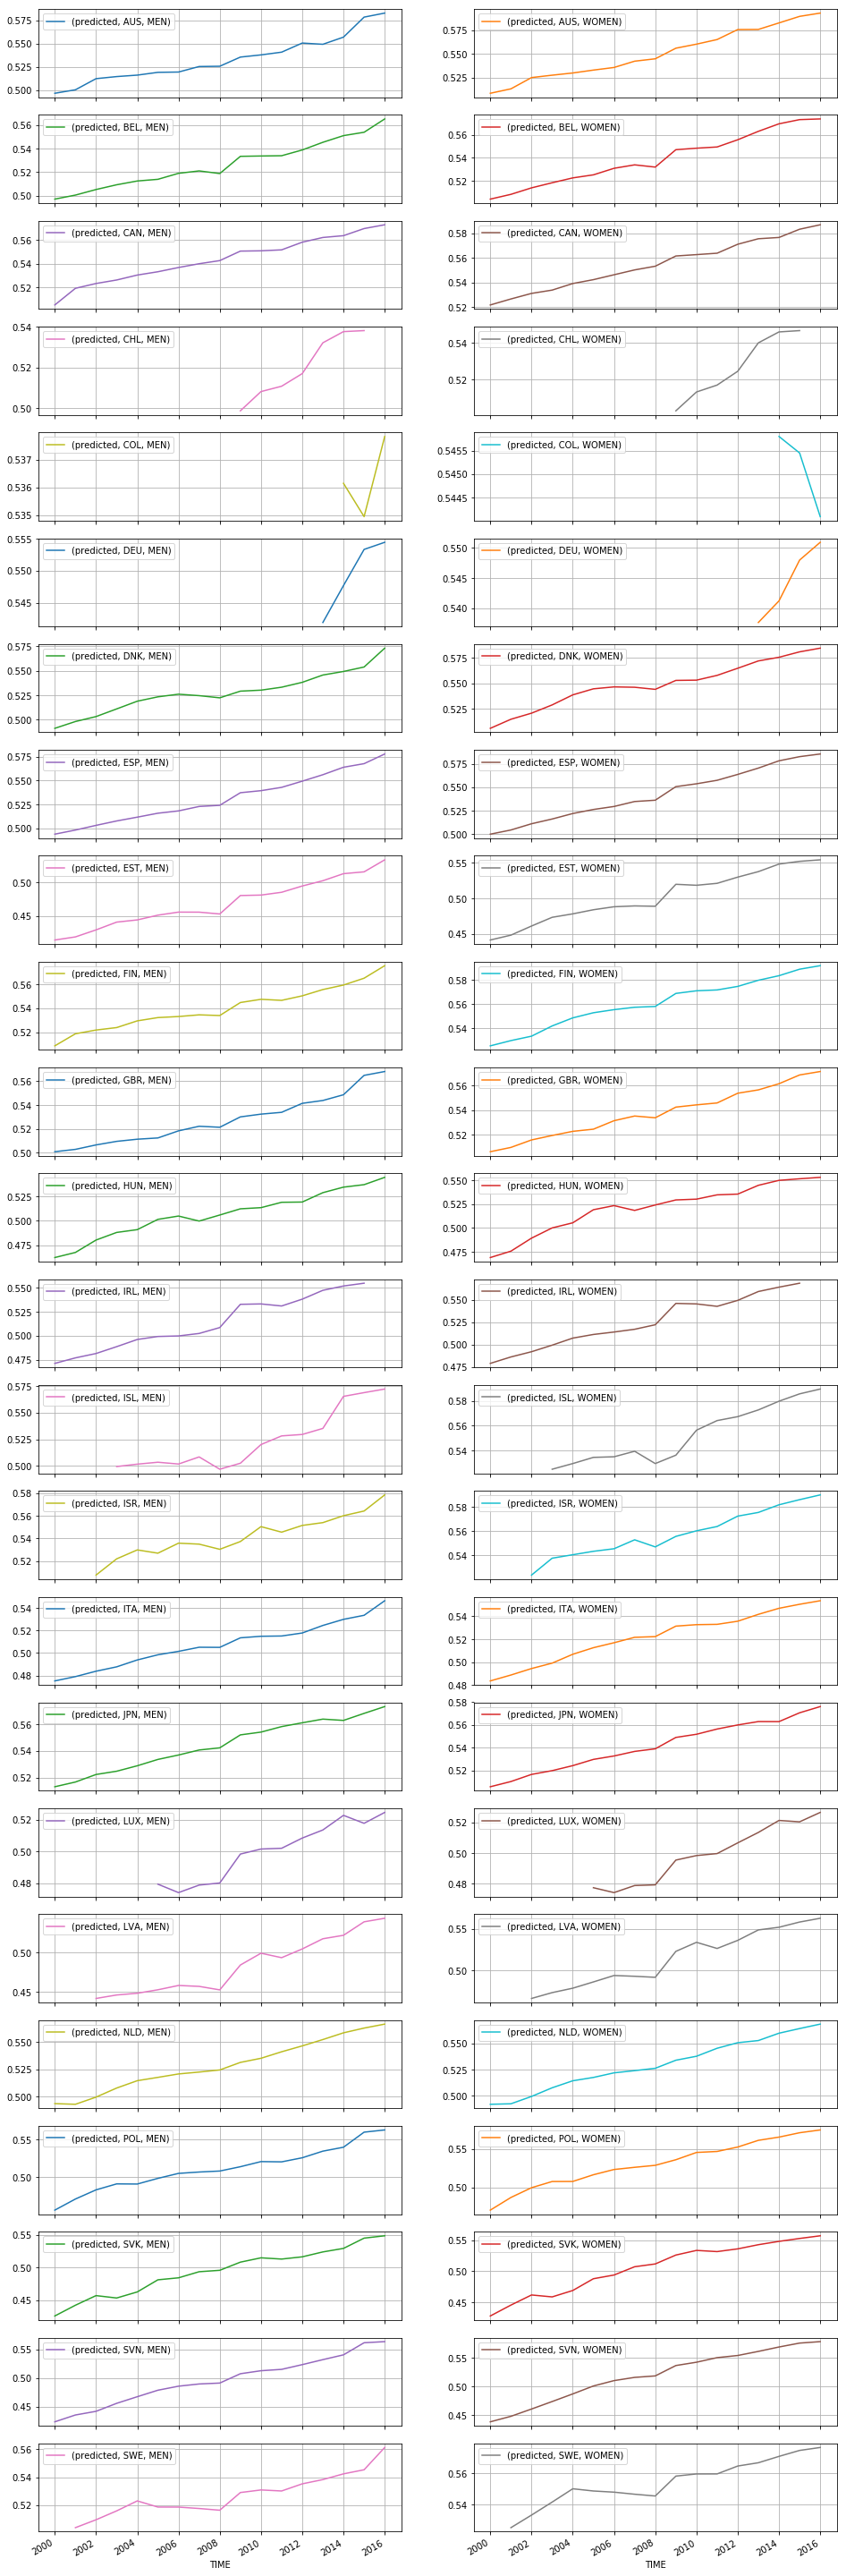

In [16]:
df2.pivot_table(index="TIME", columns=["LOCATION", "GENDER"], values=["predicted"]).plot(subplots=True, grid=True, layout=(25,2), figsize=(16,60));

## FUTURE WORK

- What external data sources can be added?

    - https://www.kaggle.com/unsdsn/world-happiness/kernels
    - http://www.oecdbetterlifeindex.org/#/11111111111
    - http://worldhappiness.report/faq/